In [6]:
import numpy as np
from scipy.io import loadmat 
import seaborn as sns
from itertools import cycle 
import matplotlib.pyplot as plt

In [7]:
def plotAll(timespan, data, dataLabels, figTitle, figXLabel, figYLabel):
    fig = plt.figure(figsize=(12, 18))
    t = fig.add_gridspec(7, 2, wspace=0.05, hspace=0.1)

    colors = plt.cm.viridis(np.linspace(0, 1, 14))
    color_cycle = cycle(colors)

    timePad = 0.0042 * (timespan[-1] - timespan[0])

    for i in range(14):
        ax = fig.add_subplot(t[i])
        name = dataLabels[i]

        ax.plot(timespan, data[:, i], label=name, color=next(color_cycle))

        ax.set_xlim(timespan[0] - timePad, timespan[-1] + timePad)
        ax.set_ylim(np.min(data), np.max(data))

        if i != 12 and i != 13:
            ax.set_xticklabels([])

        if i % 2 == 0:
            ax.set_yticklabels([])

        ax.legend(loc='upper right')

    fig.text(0.5, 0.04, figXLabel, ha='center')
    fig.text(0.04, 0.5, figYLabel, va='center', rotation='vertical')
    fig.suptitle(figTitle, fontsize=16)

    plt.show()

# Define lowpass, bandpass, highpass filtering function
def fftFilt(data, lowCO=None, highCO=None):
    freqData = np.fft.fft(data)
    freqRange = np.fft.fftfreq(np.size(data), 1/300)

    if lowCO is not None:
        freqData[freqRange < lowCO] = 0
        
    if highCO is not None:
        freqData[freqRange > highCO] = 0
    
    filteredData = np.fft.ifft(freqData)
    
    return filteredData

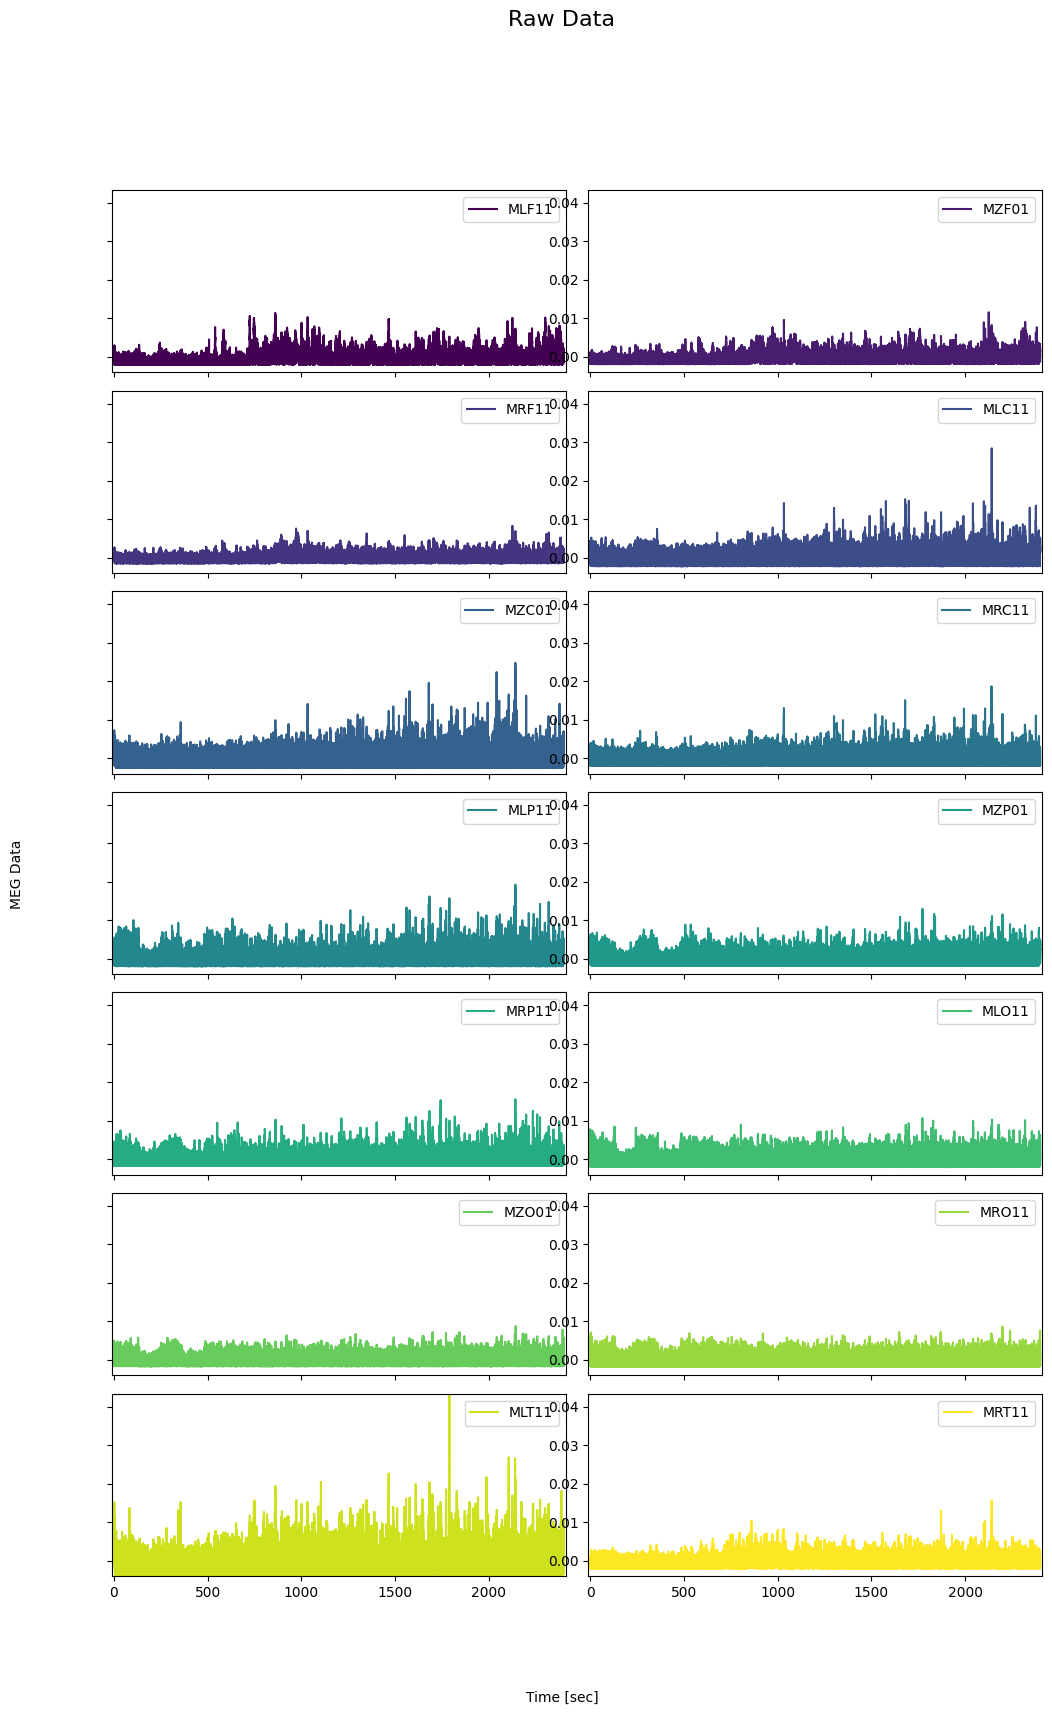

In [8]:
# Import data and find time length in seconds and minutes
output = loadmat('proj01_data.mat')
meg_data = output['meg_data']
# meg_label from MATLAB array was coming up weird because it was a cell array, so we just rebuilt it
meg_label = ["MLF11", "MZF01", "MRF11", "MLC11", "MZC01", "MRC11", "MLP11", "MZP01", "MRP11", "MLO11", "MZO01", "MRO11", "MLT11", "MRT11"]
meg_locs = output['meg_locs']
srate = output['srate']

num_samples = np.shape(meg_data)[0]
srate_sec = 1/srate
length_sec = srate_sec*num_samples
length_min = length_sec/60


timespan = np.arange(0, length_sec, srate_sec)

# Plot all signals
plotAll(timespan, meg_data, meg_label, 'Raw Data', 'Time [sec]', 'MEG Data')
plt.show()